In [1]:
import os
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt

## Loading audio files with Librosa

In [2]:
scale_file = "audio/scale.wav"
debussy_file = "audio/debussy.wav"
redhot_file = "audio/redhot.wav"
duke_file = "audio/duke.wav"

In [3]:
# load audio files with librosa
scale, sr = librosa.load(scale_file)
debussy, _ = librosa.load(debussy_file)
redhot, _ = librosa.load(redhot_file)
duke, _ = librosa.load(duke_file)

## Extracting Short-Time Fourier Transform

In [4]:
FRAME_SIZE = 2048
HOP_SIZE = 512

In [5]:
S_scale = librosa.stft(scale, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
print(S_scale.shape, S_scale[0][0], type(S_scale[0][0]), len(scale))
# 计算 freq (# frequency bins)方面的=FRAME_SIZE/2 + 1 = 2048/2 + 1 = 1025
# 计算有多少个块(# frames)需要计算：(174943-2048)/512 + 1 = 338.68
print((174943-2048)/512.0 + 1) # 问题：什么是338.68，不是342?
# 342是如何计算出来的？
#342=338+4; 2048%512=4,四是这里来的

(1025, 342) (4.9290094+0j) <class 'numpy.complex64'> 174943
338.685546875


## Calculating the spectrogram

In [6]:
Y_scale = np.abs(S_scale) ** 2
print(Y_scale.shape,type(Y_scale[0][0]))

(1025, 342) <class 'numpy.float32'>


## Visualizing the spectrogram

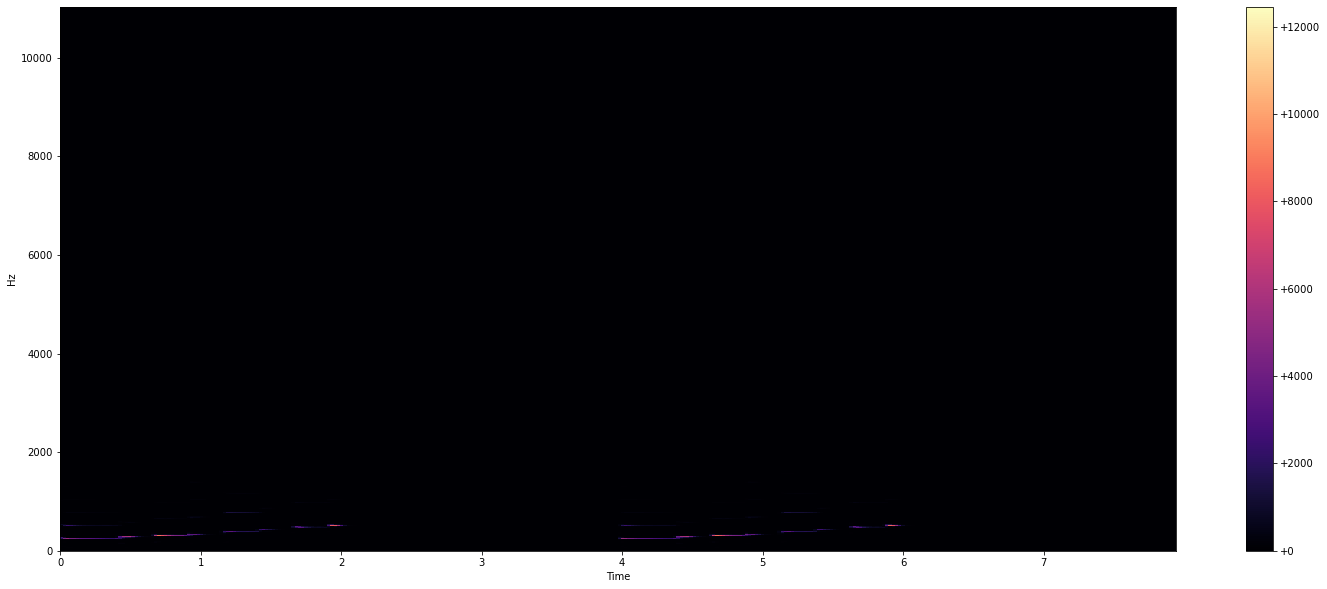

In [8]:
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y, 
                             sr=sr, 
                             hop_length=hop_length, 
                             x_axis="time", 
                             y_axis=y_axis)
    plt.colorbar(format="%+2.f")
plot_spectrogram(Y_scale, sr, HOP_SIZE) 

## Log-Amplitude Spectrogram

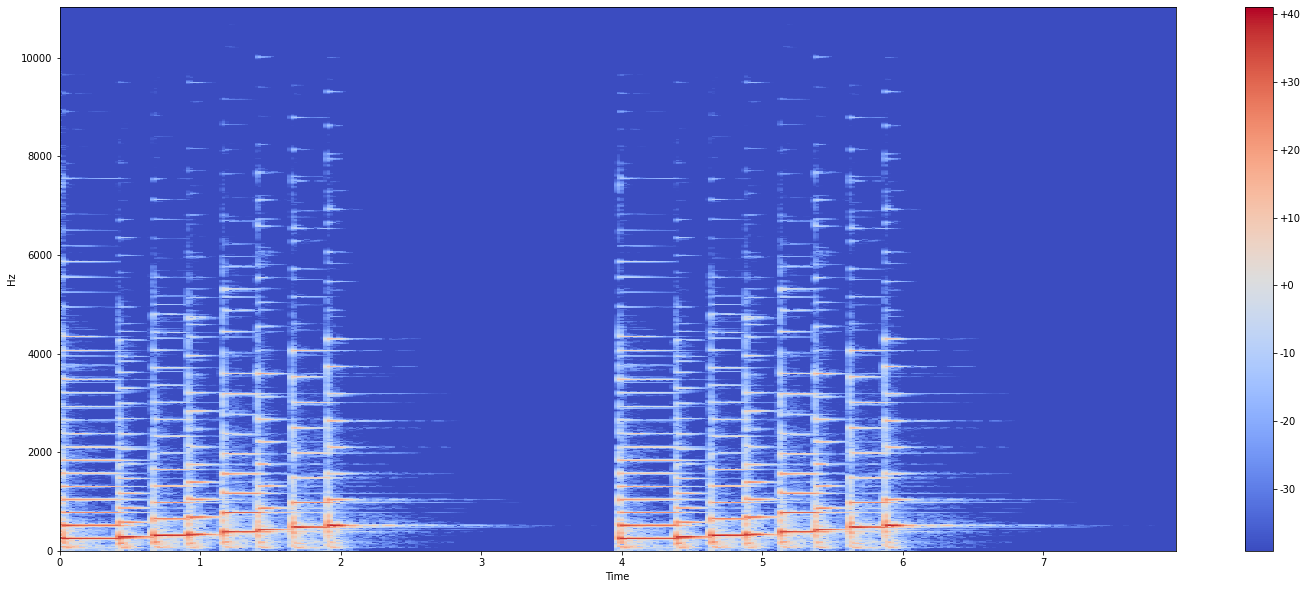

In [21]:
Y_log_scale = librosa.power_to_db(Y_scale)
plot_spectrogram(Y_log_scale, sr, HOP_SIZE)

## Log-Frequency Spectrogram

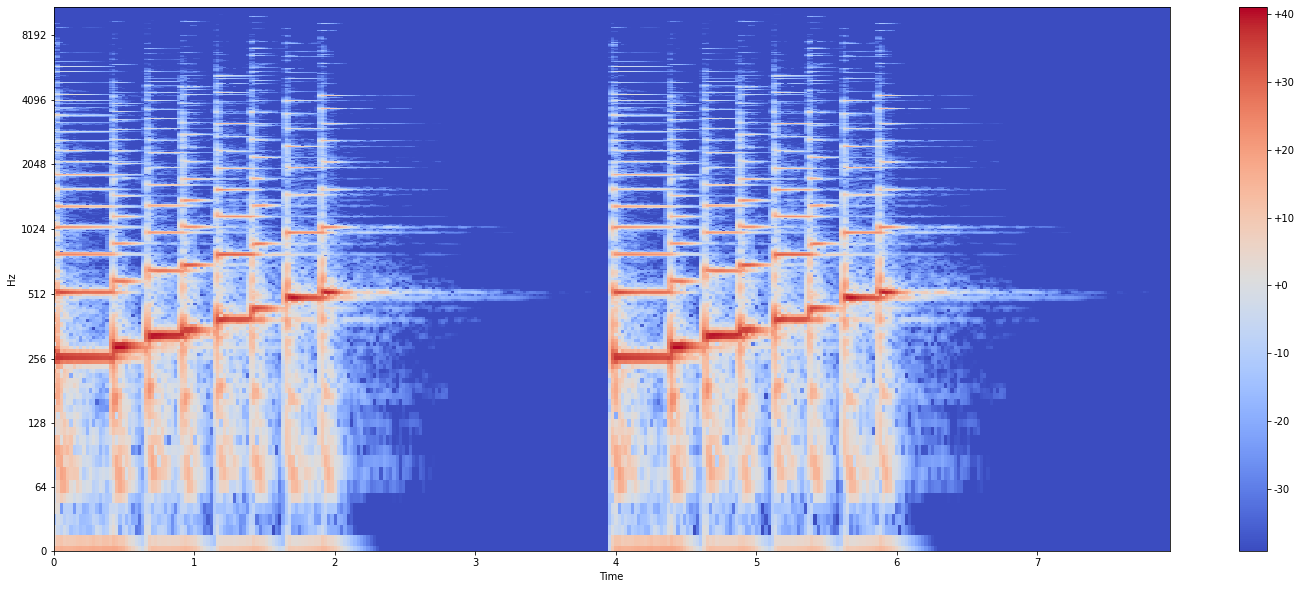

In [22]:
plot_spectrogram(Y_log_scale, sr, HOP_SIZE, y_axis="log")

## Visualising songs from different genres

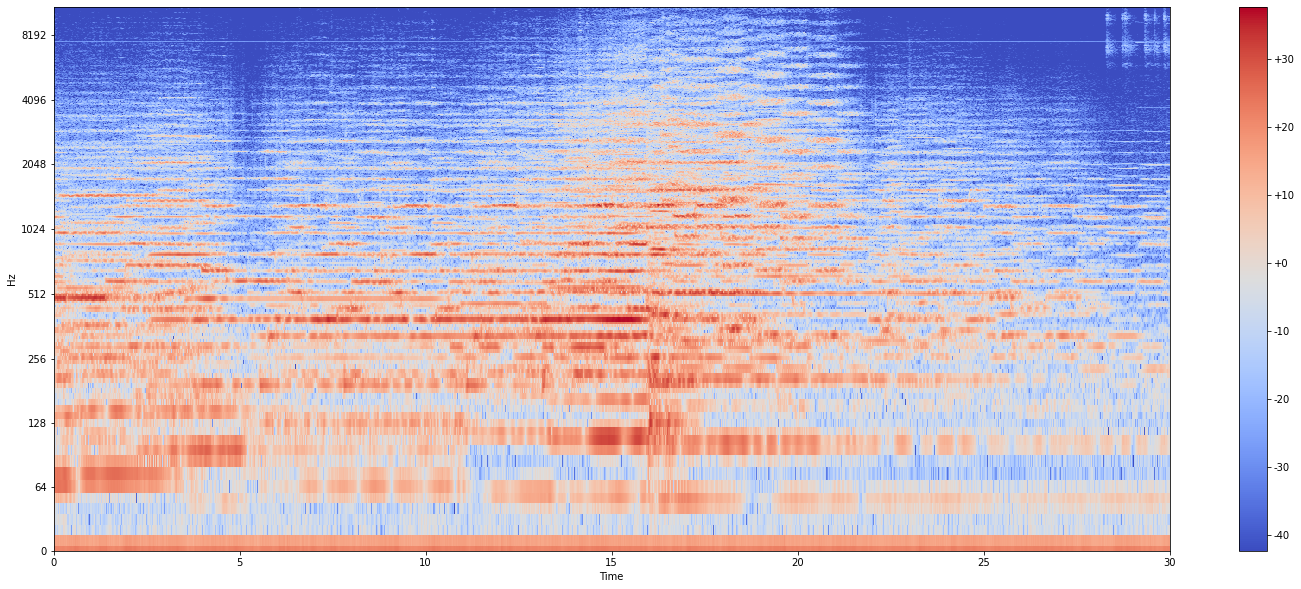

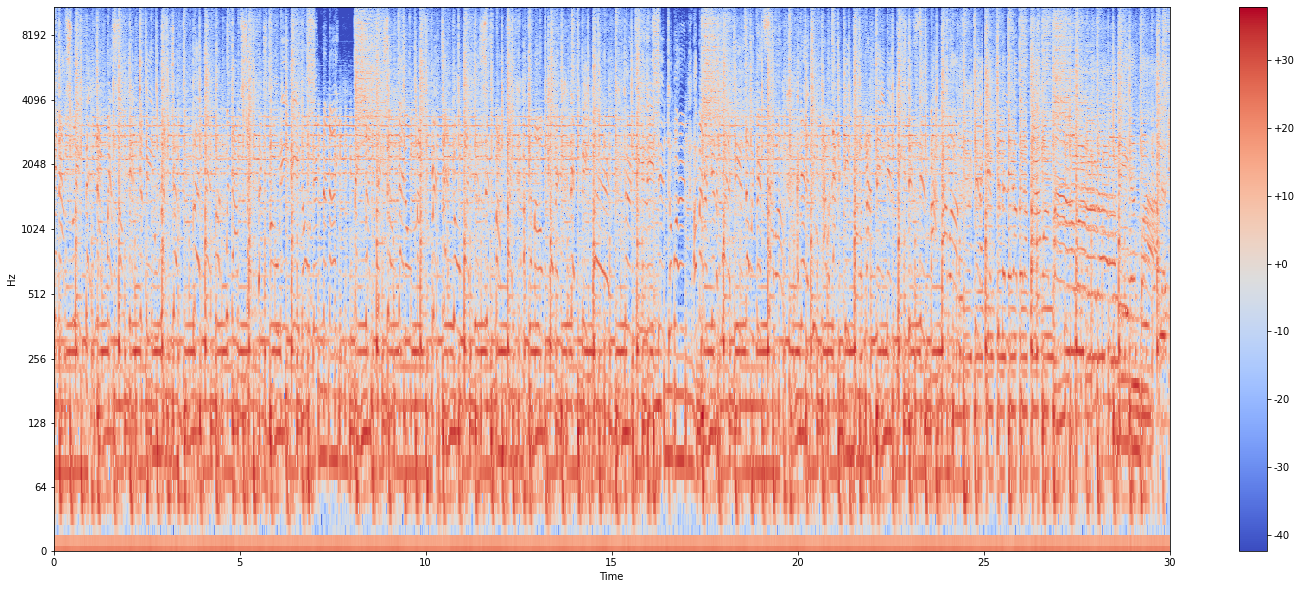

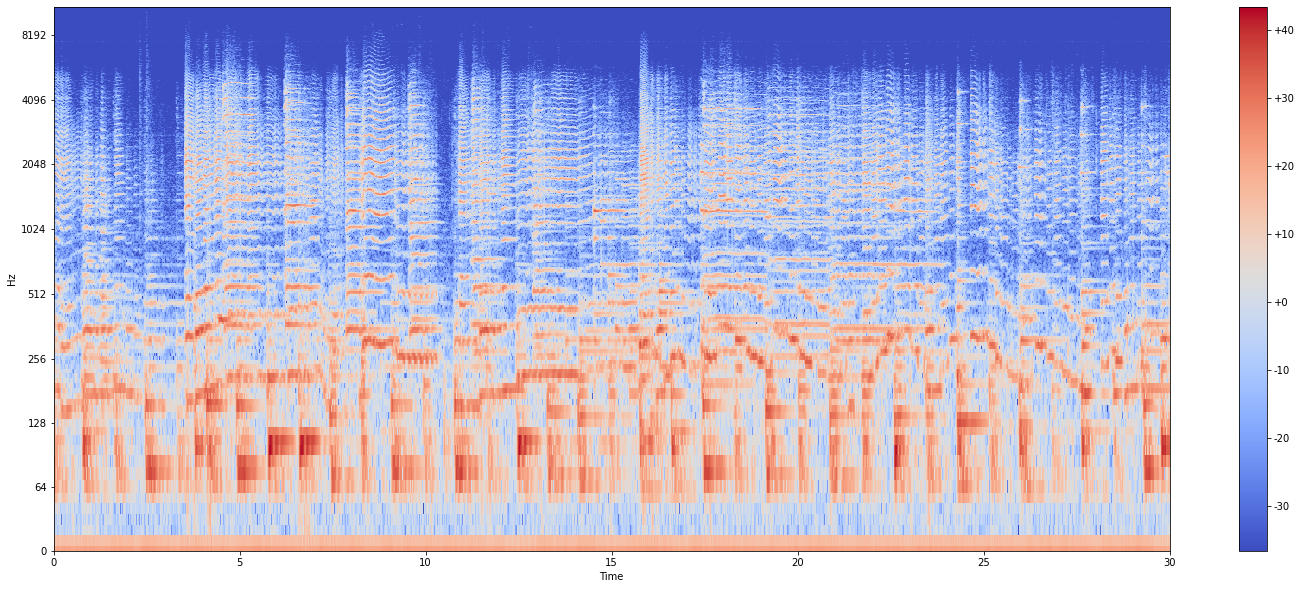

In [23]:
S_debussy = librosa.stft(debussy, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
S_redhot = librosa.stft(redhot, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
S_duke = librosa.stft(duke, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)


Y_debussy = librosa.power_to_db(np.abs(S_debussy) ** 2)
Y_redhot = librosa.power_to_db(np.abs(S_redhot) ** 2)
Y_duke = librosa.power_to_db(np.abs(S_duke) ** 2)

plot_spectrogram(Y_debussy, sr, HOP_SIZE, y_axis="log")
plot_spectrogram(Y_redhot, sr, HOP_SIZE, y_axis="log")
plot_spectrogram(Y_duke, sr, HOP_SIZE, y_axis="log")